In [126]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

players_df = pd.read_feather('../cleaned_data/players.feather')
val_df = pd.read_feather('../cleaned_data/players_valuation.feather')
appearances_df = pd.read_feather('../cleaned_data/appearances.feather')
lineups_df = pd.read_feather('../cleaned_data/game_lineups.feather')

# Players Stats

Visualizzazioni relative alle statistiche dei giocatori, comprende statistiche generali sui giocatori, classifiche e statistiche individuali

### Statistiche generali Giocatori

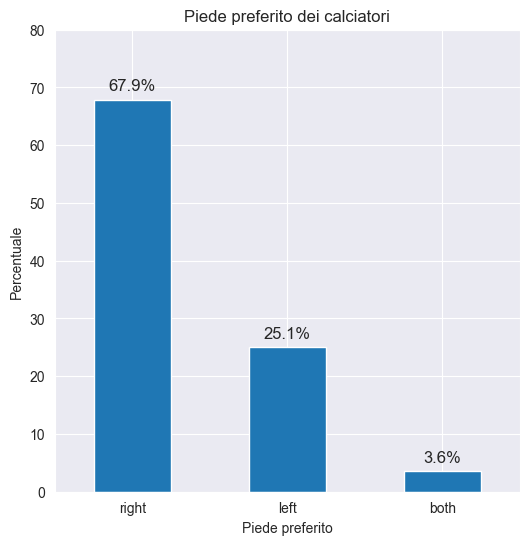

In [132]:
# piede preferito dei calciatori

foot_count = players_df['foot'].value_counts()
foot_percentage = (foot_count / len(players_df))*100

plt.figure(figsize=(6,6))
ax = foot_percentage.plot(kind='bar')

for i, v in enumerate(foot_percentage):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=12)

plt.title("Piede preferito dei calciatori")
plt.ylim(0,80)
plt.ylabel('Percentuale')
plt.xlabel('Piede preferito')
plt.xticks(rotation=0)
plt.show()

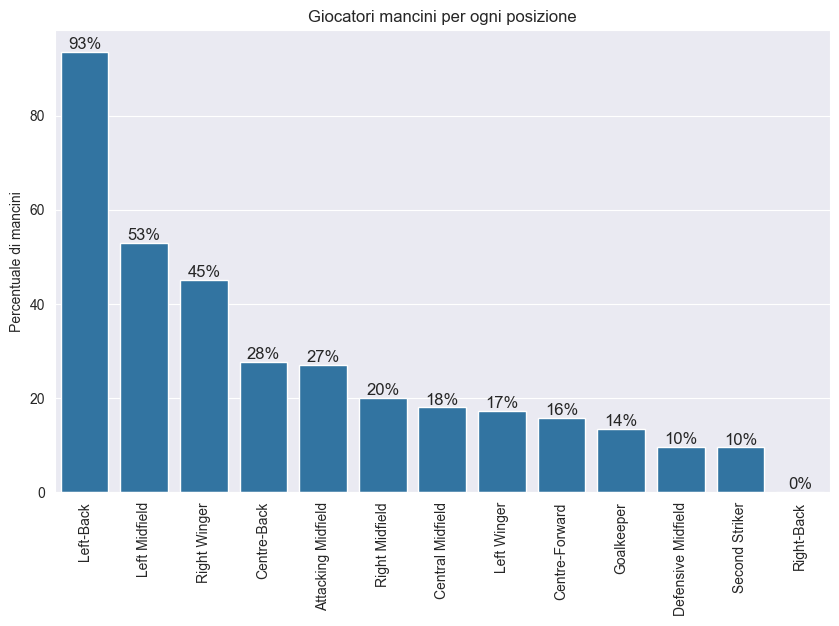

In [133]:
# distribuzione dei giocatori mancini nelle diverse posizioni

left_footed_players = players_df.query('foot == "left"')

total_players_by_position = players_df.groupby('sub_position').size()
left_footed_players_by_position = left_footed_players.groupby('sub_position').size()

left_percentage = ((left_footed_players_by_position / total_players_by_position)*100).fillna(0).round(decimals=2)

left_foot_df = (pd.DataFrame({'sub_position': left_percentage.index, 'left_percentage': left_percentage.values}).
                sort_values(by='left_percentage', ascending=False))


plt.figure(figsize=(10,6))
sns.barplot(data=left_foot_df, x='sub_position', y='left_percentage') 

counter = 0
for index, row in left_foot_df.iterrows():
    plt.text(counter, row['left_percentage'], f'{row["left_percentage"]:.0f}%', ha='center', va='bottom', fontsize=12)
    counter += 1

plt.xticks(rotation=90)
plt.title("Giocatori mancini per ogni posizione")
plt.xlabel("")
plt.ylabel("Percentuale di mancini")
plt.show()

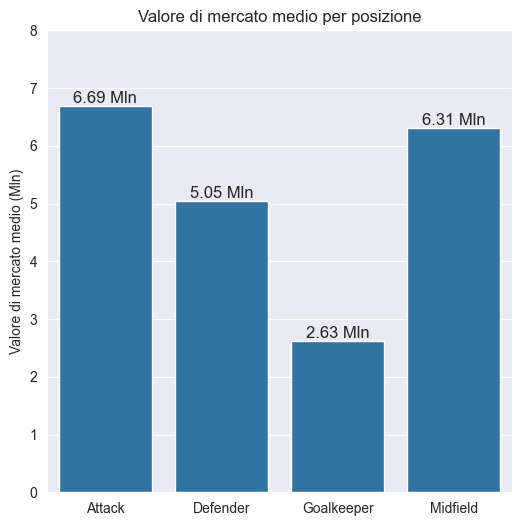

In [134]:
# valore di mercato per ogni posizione

# VDM medio per posizione
avg_vdm_by_position = players_df.dropna().groupby('position')['market_value_mln'].mean().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(data=avg_vdm_by_position, x='position', y='market_value_mln')
    
counter = 0
for index, row in avg_vdm_by_position.iterrows():
    plt.text(counter, row['market_value_mln'], f'{row["market_value_mln"]:.2f} Mln', ha='center', va='bottom', fontsize=12)
    counter += 1

plt.title('Valore di mercato medio per posizione')
plt.xlabel('')
plt.ylabel('Valore di mercato medio (Mln)')
plt.xticks(rotation=0)
plt.ylim(0,8)
plt.show()

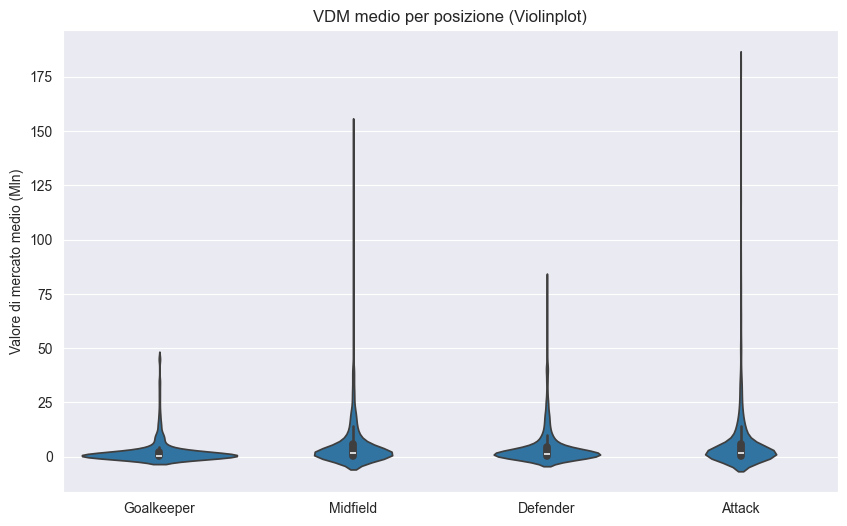

In [107]:
# valore di mercato medio per posizione (Violinplot)

plt.figure(figsize=(10,6))
sns.violinplot(data=players_df.dropna(), x='position', y='market_value_mln')

plt.title('VDM medio per posizione (Violinplot)')
plt.xlabel('')
plt.ylabel('Valore di mercato medio (Mln)')
plt.show()

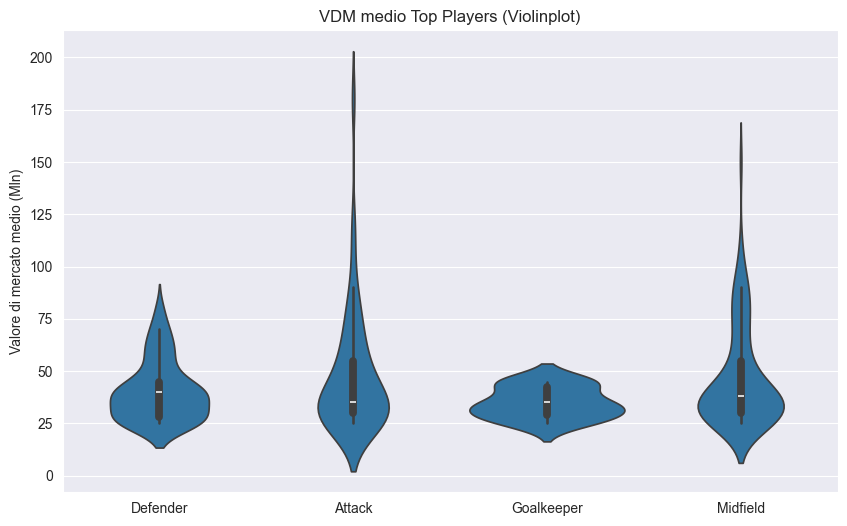

In [108]:
# valore di mercato medio per posizione (Violinplot) dei TopPlayers

top_players = players_df.dropna().query('market_value_mln >= 25')

plt.figure(figsize=(10,6))
sns.violinplot(data=top_players, x='position', y='market_value_mln')

plt.title('VDM medio Top Players (Violinplot)')
plt.xlabel('')
plt.ylabel('Valore di mercato medio (Mln)')
plt.show()

In [109]:
starting_players = lineups_df.query('is_starting == True')
unique_players = starting_players.drop_duplicates('player_id')
numbers = unique_players['shirt_number'].value_counts()

In [110]:
# numero di maglia più usato per ogni posizione

top_numbers_by_position = starting_players.groupby('sub_position')['shirt_number'].agg(pd.Series.mode)

top_numbers_by_position

sub_position
Attacking Midfield    10
Central Midfield       8
Centre-Back            4
Centre-Forward         9
Defensive Midfield     6
Goalkeeper             1
Left Midfield          3
Left Winger            7
Left-Back              3
Right Midfield         2
Right Winger           7
Right-Back             2
Second Striker        10
Name: shirt_number, dtype: Int64

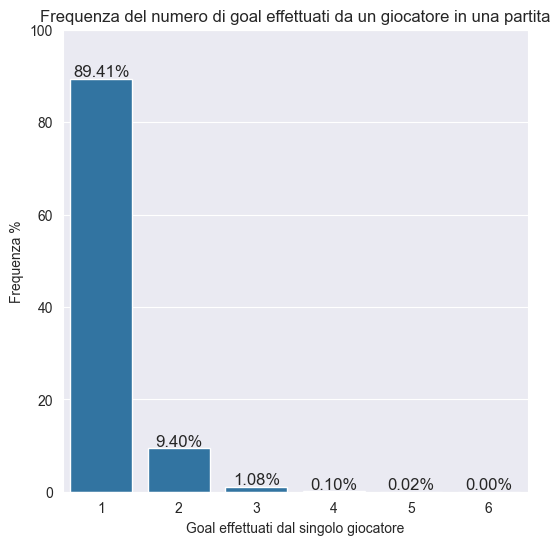

In [135]:
# distribuzione del numero di goal segnati da un giocatore in una singola partita

goals = appearances_df.query('goals >= 1')
goal_counts = goals['goals'].value_counts()
goal_percentage = goal_counts / goal_counts.sum()*100

goal_percentage_df = goal_percentage.reset_index()
goal_percentage_df.columns = ['goals', 'percentage']

plt.figure(figsize=(6,6))
sns.barplot(data=goal_percentage_df, x='goals', y='percentage')

for i in range(len(goal_percentage_df)):
    plt.text(i, goal_percentage_df['percentage'][i] + 0.5, 
             f"{goal_percentage_df['percentage'][i]:.2f}%", ha='center', fontsize=12)

plt.title('Frequenza del numero di goal effettuati da un giocatore in una partita')
plt.xlabel('Goal effettuati dal singolo giocatore')
plt.ylabel('Frequenza %')
plt.ylim(0,100)
plt.show()

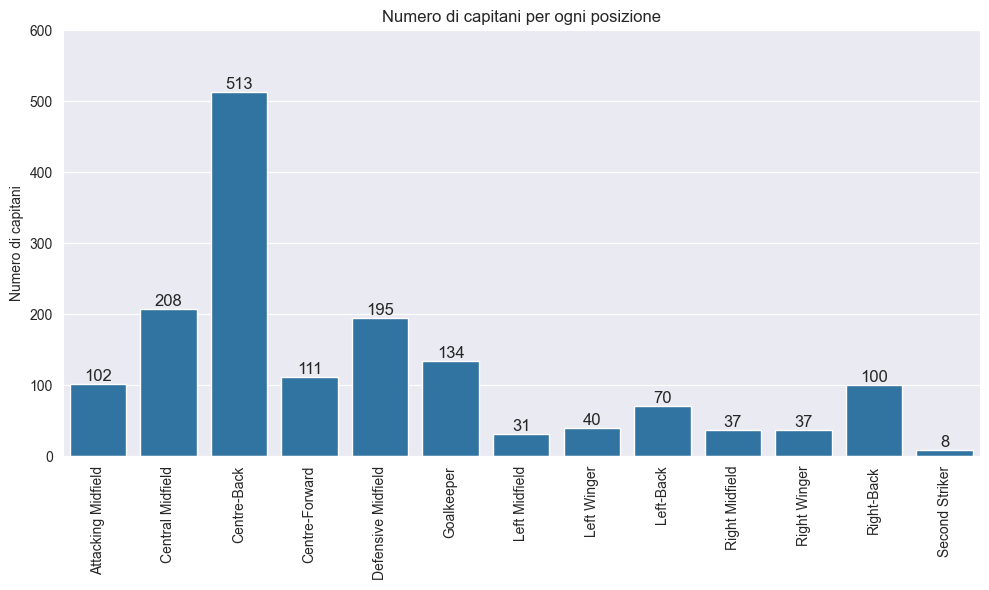

In [137]:
# posizioni con il maggior numero di capitani

captains = starting_players.query("is_captain == True")

# Rimuovi i duplicati perchè essendo il df delle formazioni ci sono più volte gli stessi giocatori
unique_captains = captains.drop_duplicates('player_id')

captains_count = unique_captains.groupby('sub_position').size().reset_index(name='count')


plt.figure(figsize=(10,6))
ax = sns.barplot(data=captains_count, x='sub_position', y='count')

for index, row in captains_count.iterrows():
    ax.annotate(row['count'], xy=(index, row['count']), ha='center', va='bottom', fontsize=12)

plt.title('Numero di capitani per ogni posizione')
plt.xlabel('')
plt.ylabel('Numero di capitani')
plt.xticks(rotation=90)
plt.ylim(0,600)
plt.tight_layout()
plt.show()

### Statistiche individuali Giocatori

In [138]:
# importiamo di nuovo i dati per comprendere tutti i giocatori dal 2012
from config import folder_path
appearances_df = pd.read_csv(f"{folder_path}/appearances.csv")
players_df = pd.read_csv(f"{folder_path}/players.csv")

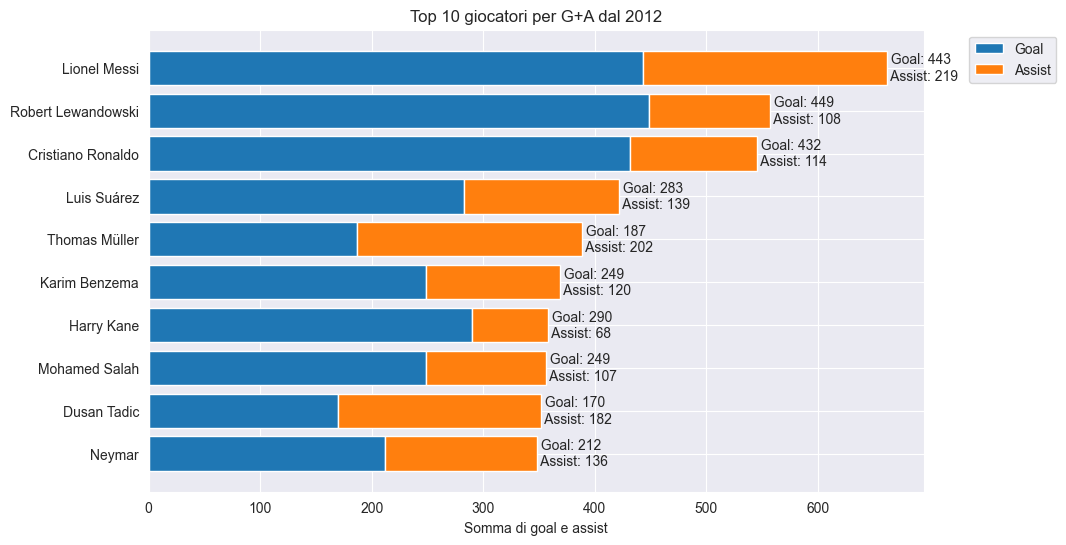

In [139]:
# migliori giocatori per goal e assist dal 2012

total_goals_assists = appearances_df.groupby('player_id')[['goals', 'assists']].sum()

merged_data = pd.merge(total_goals_assists, players_df, left_index=True, right_on='player_id')
merged_data['total_goals_assists'] = merged_data['goals'] + merged_data['assists']
top_players = merged_data.nlargest(10, 'total_goals_assists').sort_values(by='total_goals_assists')

plt.figure(figsize=(10, 6))
plt.barh(top_players['name'], top_players['goals'], label='Goal')
plt.barh(top_players['name'], top_players['assists'], left=top_players['goals'], label='Assist')

for i, (goals, assists, name) in enumerate(zip(top_players['goals'], top_players['assists'], top_players['name'])):
    plt.text(goals + assists, i, f' Goal: {goals}\n Assist: {assists}', va='center')

plt.title('Top 10 giocatori per G+A dal 2012')
plt.xlabel('Somma di goal e assist')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

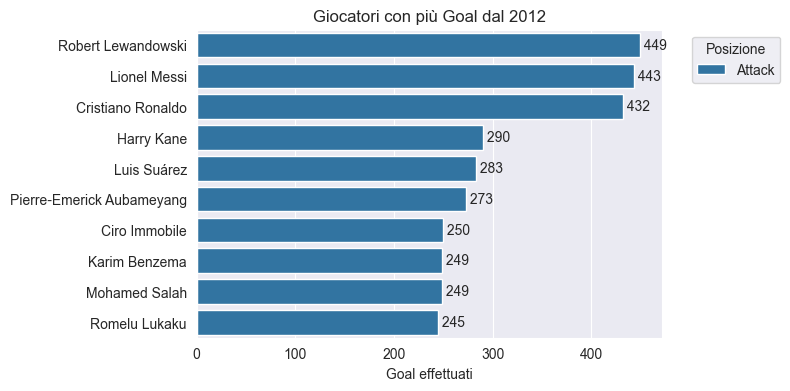

In [141]:
# giocatori con più goal segnati (dal 2012)

total_goals = appearances_df.groupby('player_id')['goals'].sum()

merged_data = pd.merge(total_goals, players_df, left_index=True, right_on='player_id')

top20_players_goals = merged_data.nlargest(10, 'goals')

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=top20_players_goals, x='goals', y='name', hue='position')

for i, (value, name) in enumerate(zip(top20_players_goals['goals'], top20_players_goals['name'])):
    ax.text(value, i, f" {value}", ha="left", va='center')

plt.title('Giocatori con più Goal dal 2012')
plt.ylabel('')
plt.xlabel('Goal effettuati')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

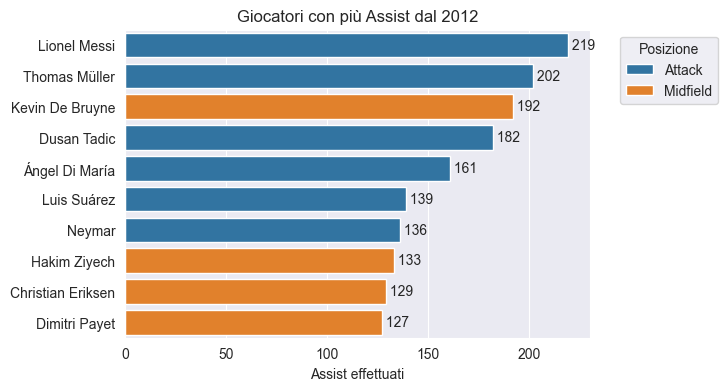

In [142]:
# giocatori con più assist effettuati dal 2012

total_assists = appearances_df.groupby('player_id')['assists'].sum()

merged_data = pd.merge(total_assists, players_df, left_index=True, right_on='player_id')

top20_players_assists = merged_data.nlargest(10, 'assists')

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=top20_players_assists, x='assists', y='name', hue='position')

for i, (value, name) in enumerate(zip(top20_players_assists['assists'], top20_players_assists['name'])):
    ax.text(value, i, f" {value}", ha="left", va='center')

plt.title('Giocatori con più Assist dal 2012')
plt.ylabel('')
plt.xlabel('Assist effettuati')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

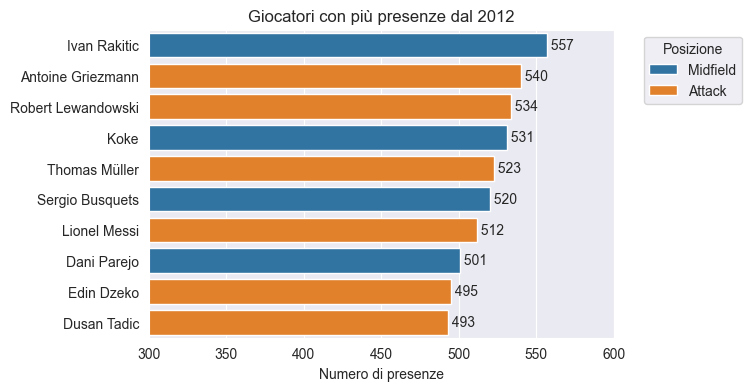

In [143]:
# giocatori con il maggior numero di presenze (dal 2012)

top_players_app = appearances_df['player_id'].value_counts().head(10)
merged_df = pd.merge(top_players_app, players_df, left_index=True, right_on='player_id')

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=merged_df, y='name', x='count', hue='position')
    
for i, (value, name) in enumerate(zip(merged_df['count'], merged_df['name'])):
    ax.text(value, i, f" {value}", ha="left", va='center')

plt.title('Giocatori con più presenze dal 2012')
plt.xlabel('Numero di presenze')
plt.ylabel('')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(300, 600)
plt.show()

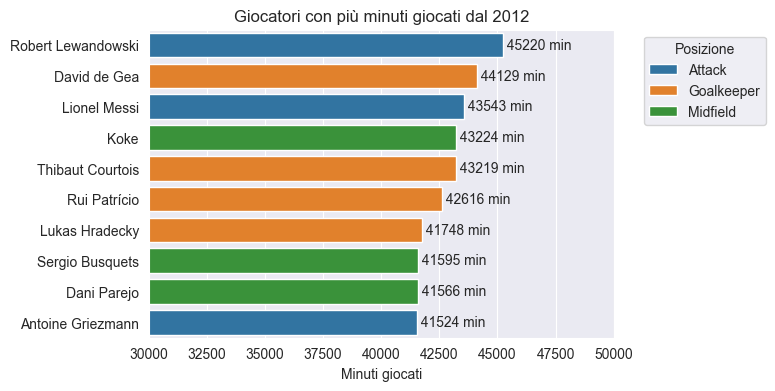

In [146]:
# giocatori con più minuti giocati (dal 2012)

total_minutes = appearances_df.groupby('player_id')['minutes_played'].sum()

merged_data = pd.merge(total_minutes, players_df, left_index=True, right_on='player_id')

top_players_minutes = merged_data.nlargest(10, 'minutes_played')

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=top_players_minutes, x='minutes_played', y='name', hue='position')

for i, (value, name) in enumerate(zip(top_players_minutes['minutes_played'], top_players_minutes['name'])):
    ax.text(value, i, f" {value} min", ha="left", va='center')

plt.title('Giocatori con più minuti giocati dal 2012')
plt.ylabel('')
plt.xlabel('Minuti giocati')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(30000, 50000)
plt.show()

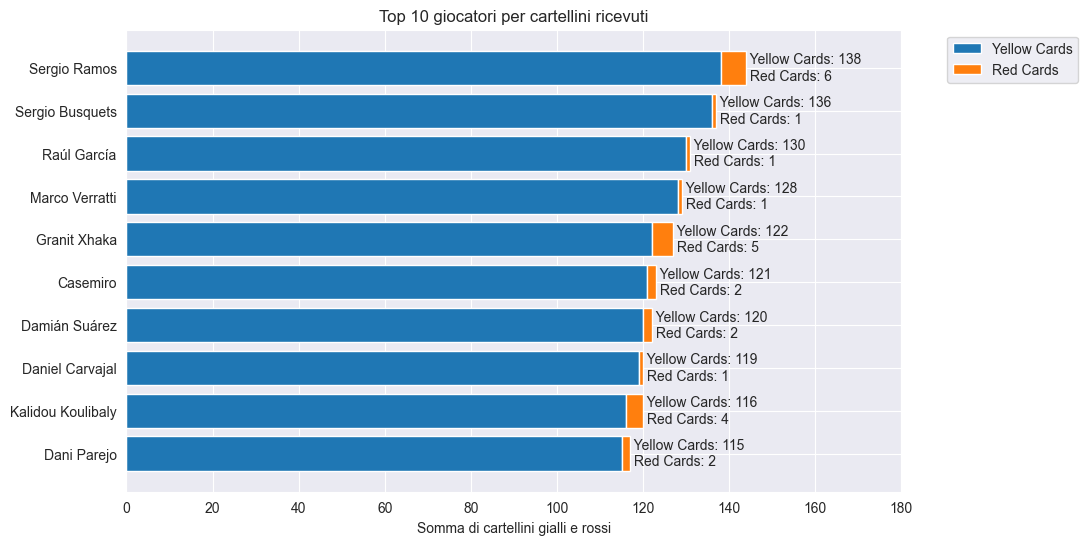

In [147]:
# giocatori con il maggior numero di ammonizioni e espulsioni

total_cards = appearances_df.groupby('player_id')[['yellow_cards', 'red_cards']].sum()

merged_data = pd.merge(total_cards, players_df, left_index=True, right_on='player_id')
merged_data['total_cards'] = merged_data['yellow_cards']+merged_data['red_cards']

top_cards = merged_data.nlargest(10, 'total_cards').sort_values(by='total_cards')

plt.figure(figsize=(10,6))
plt.barh(top_cards['name'], top_cards['yellow_cards'], label='Yellow Cards')
plt.barh(top_cards['name'], top_cards['red_cards'], label='Red Cards', left=top_cards['yellow_cards'])

for i, (yellows, reds, name) in enumerate(zip(top_cards['yellow_cards'], top_cards['red_cards'], top_cards['name'])):
    plt.text(yellows + reds, i, f' Yellow Cards: {yellows}\n Red Cards: {reds}', va='center')
    
plt.title('Top 10 giocatori per cartellini ricevuti')
plt.xlabel('Somma di cartellini gialli e rossi')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,180)
plt.show()

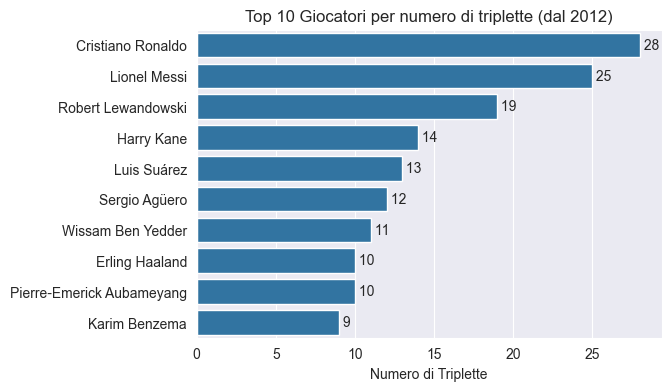

In [148]:
# giocatori con il maggior numero di triplette

hat_tricks = appearances_df.query('goals == 3')['player_id'].value_counts().head(10)
hat_tricks_df = pd.DataFrame({'player_id': hat_tricks.index, 'hat_tricks_count': hat_tricks.values})

merged_df = pd.merge(hat_tricks_df, players_df, on='player_id')


plt.figure(figsize=(6, 4))
sns.barplot(data=merged_df, y='name', x='hat_tricks_count')

for index, value in enumerate(merged_df['hat_tricks_count']):
    plt.text(value, index, f" {value}", ha='left', va='center')

plt.title('Top 10 Giocatori per numero di triplette (dal 2012)')
plt.xlabel('Numero di Triplette')
plt.ylabel('')
plt.show()

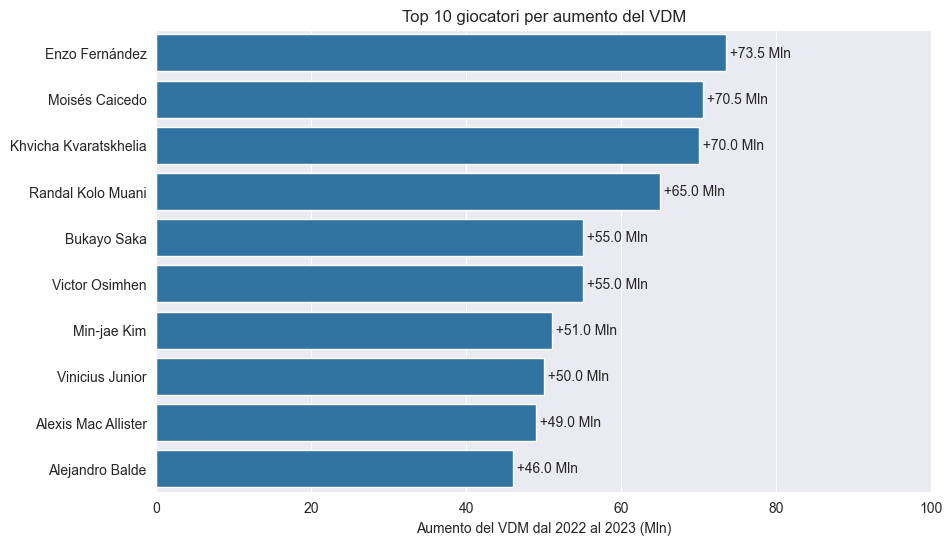

In [149]:
# top 10 giocatori per aumento del VDM

val_df['datetime'] = pd.to_datetime(val_df['datetime'])
val_df_22_23 = val_df[(val_df['datetime'].dt.year >= 2022) & (val_df['last_season'] == 2023)].sort_values(by='datetime')

diff = val_df_22_23.groupby('player_id')['market_value_mln'].agg(lambda x: x.iloc[-1] - x.iloc[0])
diff = diff.sort_values(ascending=False).head(10)

names = players_df.loc[players_df['player_id'].isin(diff.index), ['player_id', 'name']].set_index('player_id')

top10_df = pd.DataFrame({'Player': names.loc[diff.index, 'name'].values, 'Market Value Difference (Mln)': diff.values})


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10_df, x='Market Value Difference (Mln)', y='Player')

for p in ax.patches:
    ax.annotate(f' +{p.get_width():.1f} Mln', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Top 10 giocatori per aumento del VDM')
plt.xlabel('Aumento del VDM dal 2022 al 2023 (Mln)')
plt.ylabel('')
plt.xlim(0,100)
plt.show()

### Altre Statistiche Giocatori

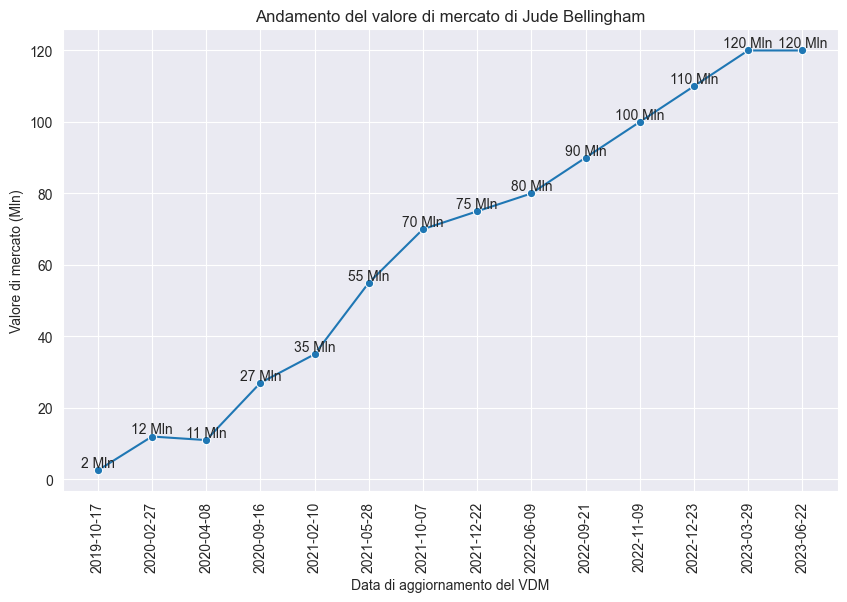

In [150]:
# andamento del VDM di un singolo giocatore

current_players = pd.read_feather('../cleaned_data/players.feather')

selected_player = current_players.query('full_name == "Jude Bellingham"')
player_id = selected_player.index[0]

market_value_evolution = val_df.query(f'player_id == {player_id}')


plt.figure(figsize=(10, 6))
sns.lineplot(data=market_value_evolution, x='date', y='market_value_mln', marker='o')

for i, row in market_value_evolution.iterrows():
    plt.text(row['date'], row['market_value_mln'], f'{row["market_value_mln"]:.0f} Mln', ha='center', va='bottom')

plt.title("Andamento del valore di mercato di Jude Bellingham")
plt.xlabel('Data di aggiornamento del VDM')
plt.ylabel('Valore di mercato (Mln)')
plt.xticks(rotation=90)
plt.show()

In [159]:
val_df.head(10)

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,club_id,league_id,market_value_mln
186,3333,2023,2004-10-04,2004-10-04,2004-10-04,7500000,1237,GB1,7.50
343,4391,2023,2004-10-04,2004-10-04,2004-10-04,1300000,383,NL1,1.30
743,8246,2023,2004-10-04,2004-10-04,2004-10-04,50000,3,L1,0.05
782,9500,2023,2004-10-04,2004-10-04,2004-10-04,750000,903,SC1,0.75
884,12029,2023,2004-10-04,2004-10-04,2004-10-04,1500000,1421,FR1,1.50
922,12589,2023,2004-10-04,2004-10-04,2004-10-04,750000,43,SC1,0.75
965,12880,2023,2004-10-04,2004-10-04,2004-10-04,50000,653,GR1,0.05
1100,14044,2023,2004-10-04,2004-10-04,2004-10-04,400000,29,GB1,0.40
1105,14086,2023,2004-10-04,2004-10-04,2004-10-04,50000,29,GB1,0.05
1147,14555,2023,2004-10-04,2004-10-04,2004-10-04,400000,281,GB1,0.40


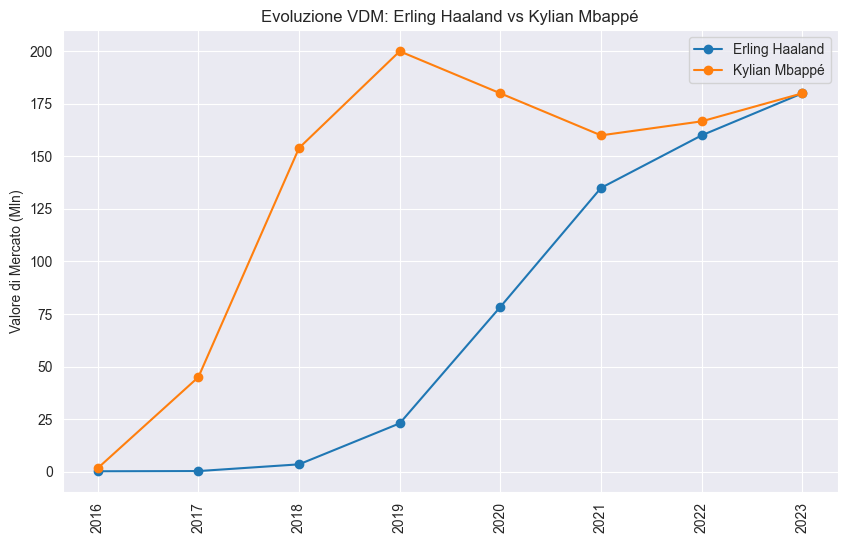

In [183]:
# confronto andamento VDM di 2 giocatori

# Selezionare due giocatori diversi
player1_name = "Erling Haaland"
player2_name = "Kylian Mbappé"

player1 = current_players.query(f'full_name == "{player1_name}"')
player2 = current_players.query(f'full_name == "{player2_name}"')

player1_id = player1.index[0]
player2_id = player2.index[0]

vdm_p1 = val_df.query(f'player_id == {player1_id}').sort_values(by='datetime')
vdm_p2 = val_df.query(f'player_id == {player2_id}').sort_values(by='datetime')

vdm_p1_year = vdm_p1.groupby(vdm_p1['datetime'].dt.to_period('Y'))['market_value_mln'].mean()
vdm_p2_year = vdm_p2.groupby(vdm_p2['datetime'].dt.to_period('Y'))['market_value_mln'].mean()

merged_data = pd.merge(vdm_p1_year, vdm_p2_year, left_index=True, right_index=True, suffixes=('_player1', '_player2')).sort_index()


plt.figure(figsize=(10, 6))
plt.plot(merged_data.index.astype(str), merged_data['market_value_mln_player1'], marker='o', label=f'{player1_name}')
plt.plot(merged_data.index.astype(str), merged_data['market_value_mln_player2'], marker='o', label=f'{player2_name}')

plt.title(f'Evoluzione VDM: {player1_name} vs {player2_name}')
plt.xlabel('')
plt.ylabel('Valore di Mercato (Mln)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [123]:
# TOP 11 lineup
ordered_df = current_players.sort_values("market_value_mln", ascending=False)

goalkeeper = ordered_df.query('position == "Goalkeeper"').head(1)
defenders = ordered_df.query('position == "Defender"').head(4)
midfielders = ordered_df.query('position == "Midfield"').head(3)
attackers = ordered_df.query('position == "Attack"').head(3)

top_11_lineup = pd.concat([goalkeeper, defenders, midfielders, attackers])

top_11_lineup[['full_name', 'club_name', 'nationality', 'position', 'market_value_mln']]

,full_name,club_name,nationality,position,market_value_mln
player_id,,,,,
108390,Thibaut Courtois,Real Madrid,Belgium,Goalkeeper,45.0
258004,Rúben Dias,Manchester City,Portugal,Defender,80.0
475959,Josko Gvardiol,Manchester City,Croatia,Defender,80.0
326031,Matthijs de Ligt,Bayern Munich,Netherlands,Defender,75.0
480267,Ronald Araújo,FC Barcelona,Uruguay,Defender,70.0
581678,Jude Bellingham,Real Madrid,England,Midfield,150.0
580195,Jamal Musiala,Bayern Munich,Germany,Midfield,110.0
683840,Pedri,FC Barcelona,Spain,Midfield,100.0
418560,Erling Haaland,Manchester City,Norway,Attack,180.0


In [124]:
# TOP 11 lineup (singolo campionato)

league = "IT1"

one_league_df = current_players[current_players['league_id'] == league].sort_values("market_value_mln", ascending=False)

goalkeeper = one_league_df.query('position == "Goalkeeper"').head(1)
defenders = one_league_df.query('position == "Defender"').head(4)
midfielders = one_league_df.query('position == "Midfield"').head(3)
attackers = one_league_df.query('position == "Attack"').head(3)

top_11_league_lineup = pd.concat([goalkeeper, defenders, midfielders, attackers])

top_11_league_lineup[['full_name', 'club_name', 'nationality', 'position', 'market_value_mln']]

,full_name,club_name,nationality,position,market_value_mln
player_id,,,,,
182906,Mike Maignan,AC Milan,France,Goalkeeper,45.0
339808,Theo Hernández,AC Milan,France,Defender,60.0
315853,Alessandro Bastoni,Inter Milan,Italy,Defender,60.0
198116,Federico Dimarco,Inter Milan,Italy,Defender,45.0
353366,Benjamin Pavard,Inter Milan,France,Defender,40.0
255942,Nicolò Barella,Inter Milan,Italy,Midfield,75.0
192735,Stanislav Lobotka,SSC Napoli,Slovakia,Midfield,40.0
354361,Frank Anguissa,SSC Napoli,Cameroon,Midfield,40.0
401923,Victor Osimhen,SSC Napoli,Nigeria,Attack,120.0
